In [1]:
# Import libraries and load data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('../data/raw/kc_house_data.csv')

In [2]:
# Extract zipcode from address string using regex
df['zipcode'] = df.address.str.extract('[\w \-.]+, [\w \-.]+, [\w \-.]+ (\d{5})').astype('int64')

In [3]:
# List of zipcodes in King County, WA
# https://www.zillow.com/browse/homes/wa/king-county/

kc_zipcodes = [98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,
               98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,
               98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,
               98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,
               98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,
               98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,
               98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,
               98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,
               98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,
               98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]

In [4]:
# Drop values not in King County, drop duplicated rows
df = df.loc[df.zipcode.isin(kc_zipcodes)].copy()
df.drop_duplicates(inplace = True)

In [5]:
# Convert date column to datetime objects
df.date = pd.to_datetime(df.date)

In [6]:
# Notice that certain addresses have multiple records
df.address.value_counts()

Delridge Way Southwest, Seattle, Washington 98106, United States           24
Northeast 201st Street, Woodinville, Washington 98072, United States       11
Interlake Avenue North, Seattle, Washington 98103, United States           11
26th Avenue, Seattle, Washington 98122, United States                       9
12006 31st Ave NE, Seattle, Washington 98125, United States                 7
                                                                           ..
15518 93rd Place Northeast, Bothell, Washington 98011, United States        1
16247 15th Avenue Northeast, Shoreline, Washington 98155, United States     1
10228 Southeast 8th Street, Bellevue, Washington 98004, United States       1
1023 Northeast 69th Street, Seattle, Washington 98115, United States        1
33911 Northeast 66th Street, Carnation, Washington 98014, United States     1
Name: address, Length: 29054, dtype: int64

In [7]:
# Extra records are a mess, multiple conflicting reports of sales price and other characteristics
df.loc[df.address == 'Delridge Way Southwest, Seattle, Washington 98106, United States'].sort_values('date')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
4057,1773100545,2021-06-11,629000.0,3,2.5,1580,920,3.0,NO,NO,...,1580,0,0,450,2015,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
5297,880000205,2021-07-09,399999.0,3,2.0,1260,1125,2.0,NO,NO,...,810,450,0,60,2011,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
7604,9485700178,2021-07-23,535000.0,3,2.0,1060,678,3.0,NO,NO,...,1060,0,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
11873,9485700182,2021-07-23,515000.0,3,2.0,1120,792,2.0,NO,NO,...,740,380,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
20934,9485700186,2021-07-23,525000.0,3,2.0,1070,1235,2.0,NO,NO,...,680,390,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
6905,1773100986,2021-07-27,645000.0,3,2.5,1640,1331,3.0,NO,NO,...,1530,350,240,0,2010,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
9359,9485700184,2021-07-28,525000.0,3,2.0,1060,678,3.0,NO,NO,...,1060,0,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
26157,9485700177,2021-08-04,525000.0,3,2.5,1070,1232,2.0,NO,NO,...,680,390,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
5001,880000207,2021-08-09,535000.0,3,2.0,1340,1353,3.0,NO,NO,...,1340,0,0,80,2013,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106
27884,9485700180,2021-08-12,520000.0,3,2.0,1120,796,2.0,NO,NO,...,740,380,0,300,2021,0,"Delridge Way Southwest, Seattle, Washington 98...",47.54391,-122.36055,98106


In [8]:
# Naively, keep the latest transaction with greatest id number for each address
df = df.sort_values(['date', 'id']).groupby(['address']).last().reset_index()

In [9]:
# Look at numerical attributes
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcode
count,2.905400e+04,2.905400e+04,29054.000000,29054.000000,29054.000000,2.905400e+04,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000,29054.000000
mean,4.530570e+09,1.114013e+06,3.438563,2.331280,2133.611310,1.728624e+04,1.511066,1828.061816,481.882185,337.350210,216.274179,1973.611930,94.298272,47.542621,-122.213681,98077.273560
std,2.879268e+09,8.971113e+05,0.978442,0.897079,977.470404,6.144338e+04,0.543157,880.604580,587.025960,286.301149,247.124963,31.597829,423.757484,0.146274,0.143640,54.727108
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.155265,-122.526650,98001.000000
25%,2.085200e+09,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.428781,-122.327710,98032.000000
50%,3.864200e+09,8.700000e+05,3.000000,2.500000,1950.000000,7.588000e+03,1.500000,1580.000000,0.000000,400.000000,140.000000,1976.000000,0.000000,47.556928,-122.232875,98059.000000
75%,7.280300e+09,1.312470e+06,4.000000,3.000000,2640.000000,1.080000e+04,2.000000,2290.000000,960.000000,520.000000,310.000000,2001.000000,0.000000,47.671840,-122.126923,98117.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,98354.000000


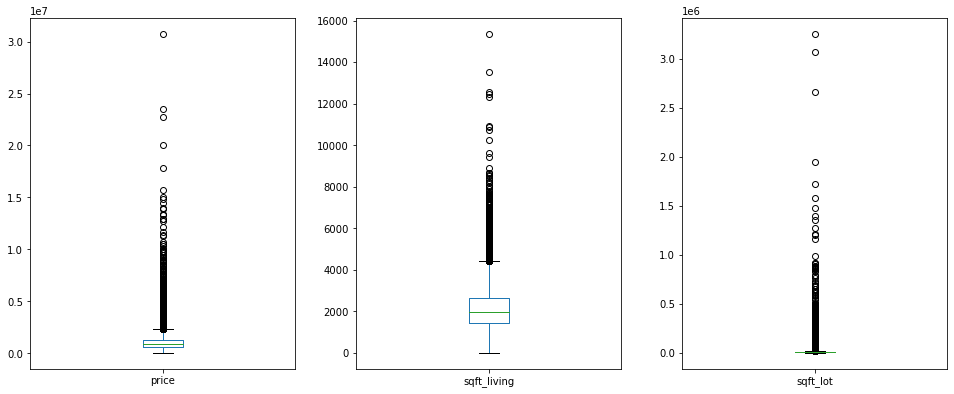

In [10]:
# Lots of outliers in price and lot sizes
fig, ax = plt.subplots(1,3,figsize = (14,6))
plt.tight_layout(pad = 3.0)
df.price.plot.box(ax = ax[0]);
df.sqft_living.plot.box(ax = ax[1]);
df.sqft_lot.plot.box(ax = ax[2]);

In [11]:
# Naively, define an acceptable upper bound for outliers of meaning as 3x standard boxplot maximum
max_outliers = (df.quantile(0.75) + (1.5 * (df.quantile(0.75) - df.quantile(0.25)))) * 3

categories_strip_max = ['price', 'sqft_living', 'sqft_lot']

# Drop entries above defined upper bound
outliers_removed = df.copy()
max_outliers['price']
for category in categories_strip_max:
    outliers_removed = outliers_removed.loc[outliers_removed[category] <= max_outliers[category]]

In [12]:
# Dropped around ~4.3% of data
(len(outliers_removed) - len(df))/(len(df))

-0.04295449851999725

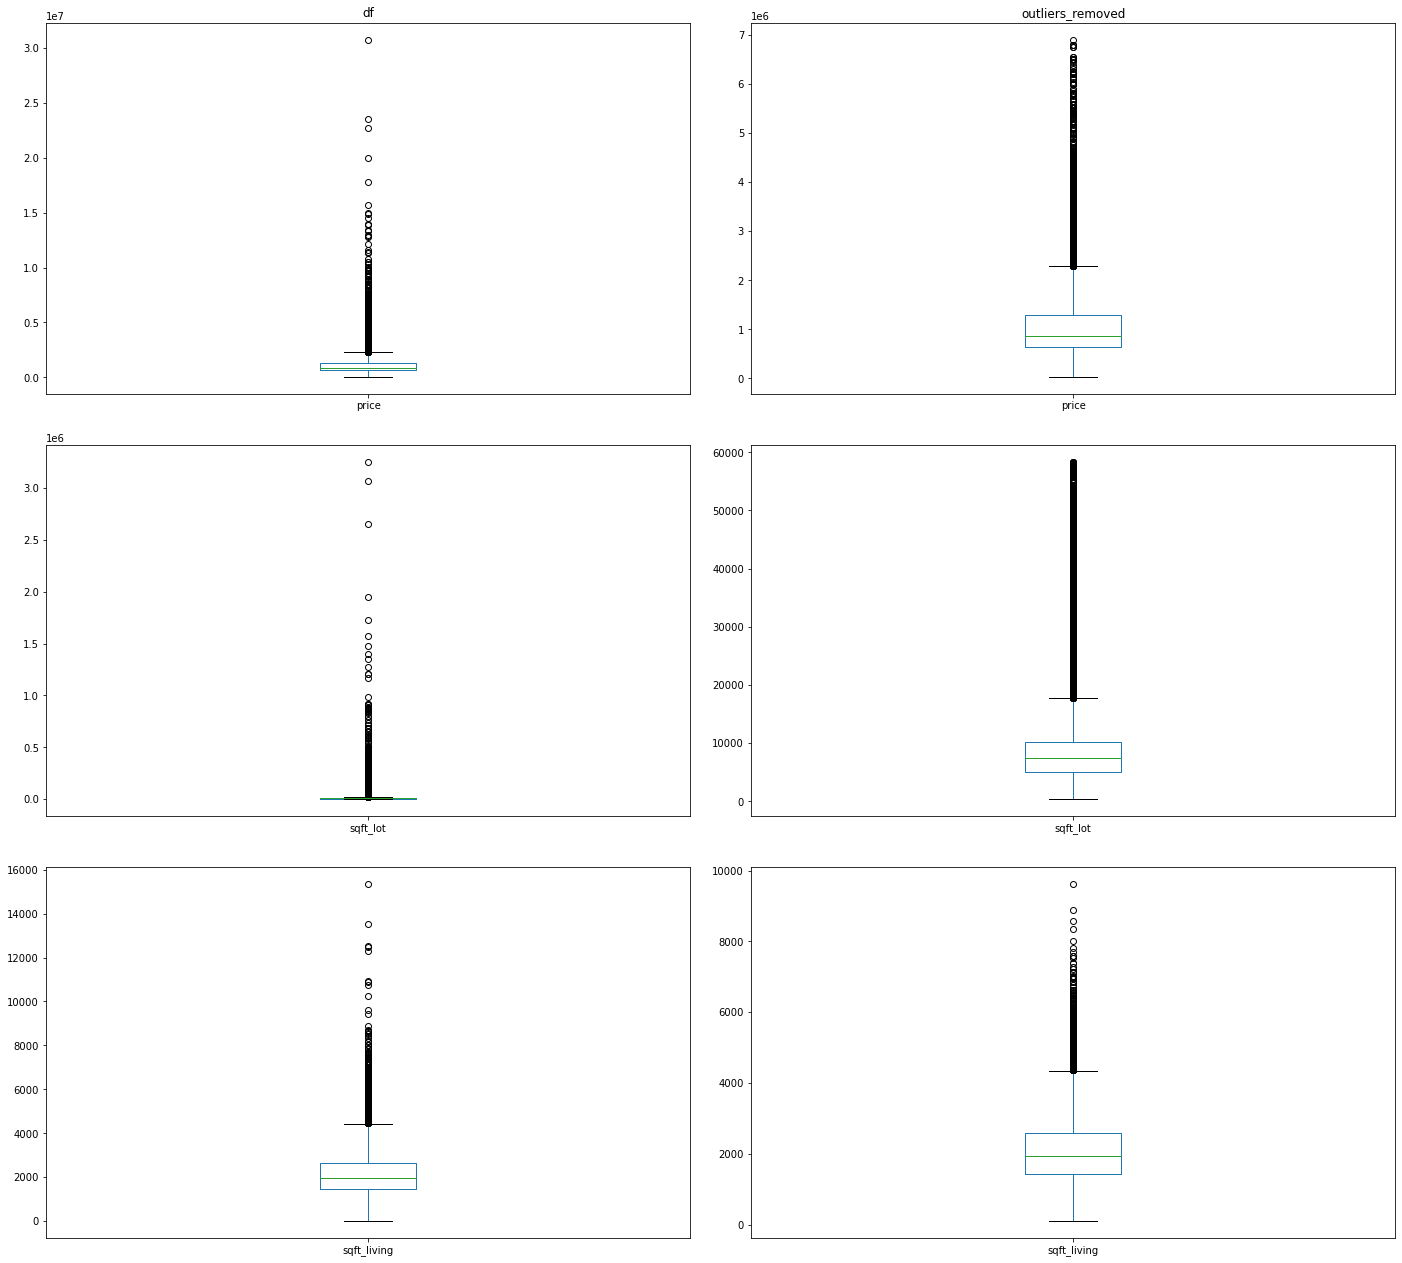

In [13]:
# Comparisons of previous and primary numerical categories
fig, ax = plt.subplots(3,2,figsize = (20,18))
plt.tight_layout(pad = 3.0)
ax[0][0].set_title('df')
ax[0][1].set_title('outliers_removed')
df.price.plot.box(ax = ax[0][0]);
outliers_removed.price.plot.box(ax = ax[0][1]);
df.sqft_lot.plot.box(ax = ax[1][0]);
outliers_removed.sqft_lot.plot.box(ax = ax[1][1]);
df.sqft_living.plot.box(ax = ax[2][0]);
outliers_removed.sqft_living.plot.box(ax = ax[2][1]);

In [14]:
# Analyze discrete numerical columns
print(outliers_removed.bathrooms.value_counts(),
      outliers_removed.bedrooms.value_counts(),
      outliers_removed.floors.value_counts(), sep = '\n\n')

2.5    7834
2.0    6629
1.0    4413
3.0    3885
3.5    1987
1.5    1701
4.0     592
4.5     465
5.0     120
5.5      83
6.0      34
0.0      30
6.5      15
7.0       6
7.5       6
0.5       5
9.5       1
Name: bathrooms, dtype: int64

3     11778
4      9054
2      3374
5      2641
6       461
1       332
7        76
0        39
8        34
9        14
10        2
11        1
Name: bedrooms, dtype: int64

1.0    13415
2.0    11111
1.5     2269
3.0      791
2.5      189
4.0       24
3.5        7
Name: floors, dtype: int64


In [15]:
# Create function to squash tiny outlier groups at extreme ends of discrete categories
def squash_groups(value, floor, ceiling):
    if value < floor:
        return floor
    elif value > ceiling:
        return ceiling
    return value

groups_squashed = outliers_removed.copy()

groups_squashed.bathrooms = groups_squashed.bathrooms.apply(lambda x: squash_groups(x, 1.0, 6.0))
groups_squashed.bedrooms = groups_squashed.bedrooms.apply(lambda x: squash_groups(x, 1, 7))
groups_squashed.floors = groups_squashed.floors.apply(lambda x: squash_groups(x, 1.0, 3.0))

In [16]:
# Analyze categorical groups
print(groups_squashed.waterfront.value_counts(),
      groups_squashed.greenbelt.value_counts(),
      groups_squashed.nuisance.value_counts(),
      groups_squashed.view.value_counts(),
      groups_squashed.condition.value_counts(),
      groups_squashed.grade.value_counts(),
      groups_squashed.heat_source.value_counts(),
      groups_squashed.sewer_system.value_counts(), sep = '\n\n')

NO     27402
YES      404
Name: waterfront, dtype: int64

NO     27048
YES      758
Name: greenbelt, dtype: int64

NO     23094
YES     4712
Name: nuisance, dtype: int64

NONE         24627
AVERAGE       1739
GOOD           759
EXCELLENT      472
FAIR           209
Name: view, dtype: int64

Average      16724
Good          7689
Very Good     3136
Fair           204
Poor            53
Name: condition, dtype: int64

7 Average        11235
8 Good            8441
9 Better          3365
6 Low Average     2741
10 Very Good      1201
5 Fair             350
11 Excellent       329
12 Luxury           79
4 Low               43
3 Poor              11
13 Mansion           8
1 Cabin              2
2 Substandard        1
Name: grade, dtype: int64

Gas                  19494
Electricity           5365
Oil                   2766
Gas/Solar               89
Electricity/Solar       54
Other                   10
Oil/Solar                4
Name: heat_source, dtype: int64

PUBLIC                24537
PRIVAT

In [17]:
# Convert binary categorical columns to 0s and 1s
def convert_binary_column(value):
    if value.lower().strip() == 'no':
        return 0
    return 1

binaries_converted = groups_squashed.copy()

binaries_converted.waterfront = binaries_converted.waterfront.apply(lambda x: convert_binary_column(x))
binaries_converted.greenbelt = binaries_converted.greenbelt.apply(lambda x: convert_binary_column(x))
binaries_converted.nuisance = binaries_converted.nuisance.apply(lambda x: convert_binary_column(x))

In [18]:
all_columns_cleaned = binaries_converted.copy()

# Convert nan heat sources into Other category, merge Oil/Solar into Other due to small sample size
all_columns_cleaned.heat_source.fillna('Other', inplace = True)
all_columns_cleaned.heat_source = all_columns_cleaned.heat_source.apply(lambda x: x if x != 'Oil/Solar' else 'Other')

# Convert nan sewer system into PUBLIC, drop distinction between restricted/unrestricted
all_columns_cleaned.sewer_system.fillna('PUBLIC', inplace = True)
all_columns_cleaned.sewer_system = all_columns_cleaned.sewer_system.apply(lambda x: x.split()[0])

# Select only numerical value from grade, then group 1-3 together and 12-13 together, recenter with 5 = average at middle
all_columns_cleaned.grade = all_columns_cleaned.grade.apply(lambda x: squash_groups(int(x.split()[0]), 3, 12) - 2)

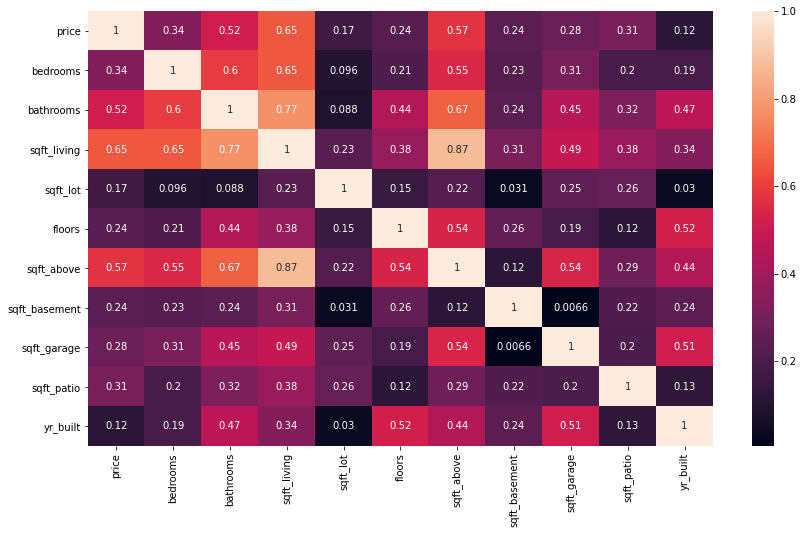

In [19]:
# Examine absolute correlation coefficients between numeric variables
numerical_categories = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                        'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio','yr_built']

fig, ax = plt.subplots(figsize = (14, 8))
sns.heatmap(all_columns_cleaned[numerical_categories].corr().abs(), annot = True, ax = ax);

In [20]:
some_col_ohe = all_columns_cleaned.copy()

# Year renovated is ~95.4% null values, likely due to lack of input, id is no longer needed
col_to_drop = ['id', 'yr_renovated']

some_col_ohe.drop(col_to_drop, axis = 1, inplace = True)

# Columns to one hot encode, heat_source reference = Gas, sewer_system reference = PUBLIC
col_to_ohe_always = ['sewer_system', 'heat_source']
some_col_ohe = pd.get_dummies(some_col_ohe, columns = col_to_ohe_always)
some_col_ohe.drop(['heat_source_Gas', 'sewer_system_PUBLIC'], axis = 1, inplace = True)

In [21]:
# Ordinalize remaining categorical information
data_cleaned_ordinalized = some_col_ohe.copy()

# Convert view and condition columns to numerical ordinal information
view_map = {'NONE': 1, 'FAIR': 2, 'AVERAGE': 3, 'GOOD': 4, 'EXCELLENT': 5}
condition_map = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}

data_cleaned_ordinalized.view = data_cleaned_ordinalized.view.apply(lambda x: view_map[x])
data_cleaned_ordinalized.condition = data_cleaned_ordinalized.condition.apply(lambda x: condition_map[x])

# Write to parquet file
data_cleaned_ordinalized.to_parquet('../data/cleaned/data_cleaned_ordinalized.parquet')

In [22]:
# One-hot encode remaining categorical information
data_cleaned_ohe = some_col_ohe.copy()

# Convert grade column to categorical information
grade_map = {1: 'Poor', 2: 'Low', 3: 'Fair', 4: 'Low_Average', 5: 'Average',
             6: 'Good', 7: 'Better', 8: 'Very_Good', 9: 'Excellent', 10: 'Luxury'}
data_cleaned_ohe.grade = data_cleaned_ohe.grade.apply(lambda x: grade_map[x])

# One hot encode selected columns, grade reference = Average, condition reference = Average, view reference = NONE
col_to_ohe = ['view', 'condition', 'grade']
data_cleaned_ohe = pd.get_dummies(data_cleaned_ohe, columns = col_to_ohe)
data_cleaned_ohe.drop(['grade_Average', 'condition_Average', 'view_NONE'], axis = 1, inplace = True)

# Write to parquet file
data_cleaned_ohe.to_parquet('../data/cleaned/data_cleaned_ohe.parquet')

In [23]:
# Create combined data frame with both ordinalized and one-hot encoded columns
data_all_columns = data_cleaned_ordinalized.merge(data_cleaned_ohe,
                                                  how = 'inner',
                                                  on = [x for x in some_col_ohe.columns.values \
                                                        if x not in col_to_ohe])

# Write to parquet file
data_all_columns.to_parquet('../data/cleaned/data_cleaned_all.parquet')